In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [6]:
df = read.csv("../data/steps_percentiles_by_country_gender_20170511.csv") 
df$gender = factor(df$gender, levels = c("male", "female"))

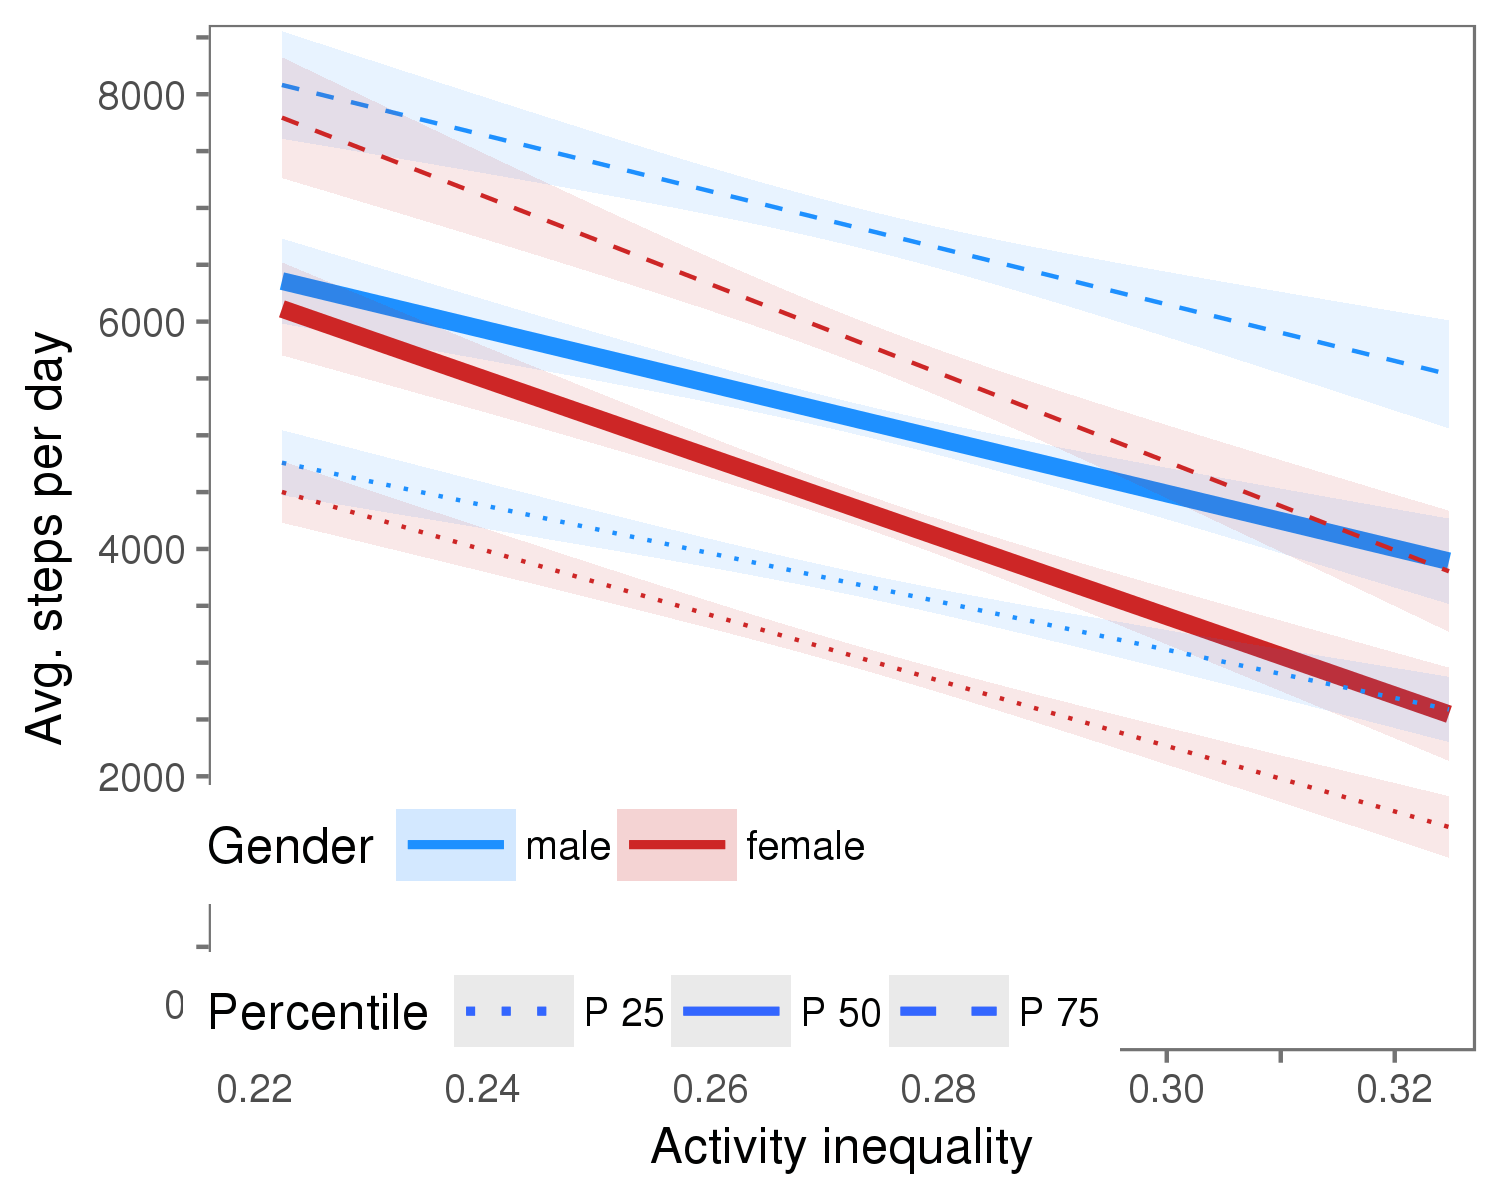

In [7]:
p <- ggplot(df, aes(steps_gini, steps_mean, color=gender, fill=gender, linetype=percentile))
p <- p + geom_smooth(data=df[df$percentile=="P 50", ], method="lm", se=T, alpha=.10, size=2.0)
p <- p + geom_smooth(data=df[df$percentile!="P 50", ], method="lm", se=T, alpha=.10, size=.5)

p <- p + labs(fill = "Gender")
p <- p + labs(colour = "Gender")
p <- p + labs(linetype = "Percentile")

p <- p + scale_linetype_manual(values=c("dotted", "solid", "dashed"))
p <- p + scale_color_manual(values=c("dodgerblue", "firebrick3"))
p <- p + scale_fill_manual(values=c("dodgerblue", "firebrick3"))

p <- p + xlab("Activity inequality") + ylab("Avg. steps per day")
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + theme(legend.justification=c(0,0), legend.position=c(-.02, -.02), legend.direction="horizontal", 
               legend.box.just = "left", legend.key.width=unit(2,"line"))
p <- p + guides(linetype = guide_legend(override.aes = list(size=1)))
p <- p + guides(color = guide_legend(override.aes = list(size=1)))

# xticks
ticks = seq(.20,.40,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.2f", ticks[seq(1, length(labels), 2)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels) #, limits=c(.215, .405))

# yticks
ticks = seq(0,10000,by=500) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 4)] = sprintf("%d", ticks[seq(1, length(labels), 4)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels)# limits=c(0,8800))
p <- p + coord_cartesian(xlim=c(.221, .322), ylim=c(0, 8200))

p 

ggsave(filename="../output/fig2b.pdf", plot=p, width=4, height=3)

As activity inequality increases, median activity (50th percentile) decreases by 39% for males (blue) and by 58% for females (red)

In [8]:
# Percentage reduction in PA from left to right

LEFT = min(df$steps_gini)
RIGHT = max(df$steps_gini)

m <- lm(steps_mean ~ gender +  gender : steps_gini -1, data=df[df$percentile=="P 50", ])
# summary(m)

MALE_LEFT = m$coefficients[1] + LEFT * m$coefficients[3]
MALE_RIGHT = m$coefficients[1] + RIGHT * m$coefficients[3]

FEMALE_LEFT = m$coefficients[2] + LEFT * m$coefficients[4]
FEMALE_RIGHT = m$coefficients[2] + RIGHT * m$coefficients[4]

1.0 - MALE_RIGHT / MALE_LEFT
1.0 - FEMALE_RIGHT / FEMALE_LEFT

gendermale 
 0.3878101

genderfemale 
   0.5834856